# Plotting Cat Data

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

## Exploring Data

In [27]:
cats = pd.read_csv('../data/cats_dataset.csv') #Turning .csv file into a DataFrame

print(cats.head()) #Checking the first few rows
print(cats.tail()) #Checking the last few rows

              Breed  Age (Years)  Weight (kg)          Color  Gender
0      Russian Blue           19            7  Tortoiseshell  Female
1  Norwegian Forest           19            9  Tortoiseshell  Female
2         Chartreux            3            3          Brown  Female
3           Persian           13            6          Sable  Female
4           Ragdoll           10            8          Tabby    Male
                  Breed  Age (Years)  Weight (kg)          Color  Gender
995   British Shorthair           19            5           Gray  Female
996   British Shorthair           11            2        Bicolor  Female
997            Savannah           12            5        Bicolor  Female
998  American Shorthair            8            3  Tortoiseshell  Female
999           Chartreux           11            4          Sable  Female


In [28]:
cats.shape #Displays DataFrame dimensions

(1000, 5)

In [29]:
cats.info() #Displays index range, non-null sums per column, and data types by column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Breed        1000 non-null   object
 1   Age (Years)  1000 non-null   int64 
 2   Weight (kg)  1000 non-null   int64 
 3   Color        1000 non-null   object
 4   Gender       1000 non-null   object
dtypes: int64(2), object(3)
memory usage: 39.2+ KB


In [30]:
cats.describe() #Displays statistics for DataFrame

,Age (Years),Weight (kg)
count,1000.000000,1000.00000
mean,10.210000,5.55000
std,5.535751,2.22676
min,1.000000,2.00000
25%,5.000000,4.00000
50%,10.000000,6.00000
75%,15.000000,7.00000
max,19.000000,9.00000


In [31]:
cats.isnull().sum() #Checking for null values

Breed          0
Age (Years)    0
Weight (kg)    0
Color          0
Gender         0
dtype: int64

## Cleaning Data

In [32]:
#Everything looks good. No nulls. Data types (from info) make sense. I'm only going to change some column names.

cats.columns = cats.columns.str.lower() #change everything to lower case
cats.rename(columns={'age (years)' : 'age_years', 'weight (kg)' : 'weight_kg', 'gender' : 'sex'}, inplace=True) #inplace makes the change to the original instead of creating something new

cats.columns #Checking my work

Index(['breed', 'age_years', 'weight_kg', 'color', 'sex'], dtype='object')

In [33]:
#Oops. Everything is an object now? Let's check.

cats.dtypes

#Okay. Looks good. I guess dtype for the cell above referred to the column names.

breed        object
age_years     int64
weight_kg     int64
color        object
sex          object
dtype: object

## Plotting Data

### <u>Matplotlib Plots</u>

#### *Number of Male and Female Cats in Sample - Pie Chart*

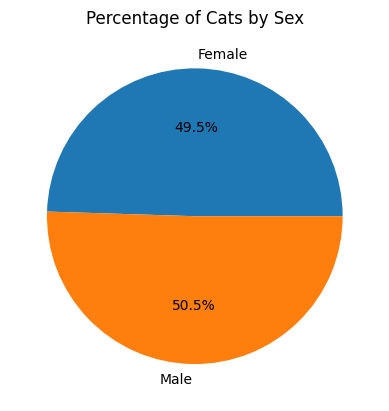

In [34]:
#This was initially going to be a pie chart of breeds, but--wow--there were a lot of breeds!

#Let's start by grouping cats by breed and totalling the amount per sex.
sex_count = cats.groupby('sex').size()

#Because it's going to be a pie chart, I need to convert this number to a percentage.
sex_percentage = (sex_count / sex_count.sum()) * 100

# Plot
plt.pie(sex_percentage, labels=sex_percentage.index, autopct='%1.1f%%') #each slice will be based on sex_percentage and the labels come from the index of it
plt.title('Percentage of Cats by Sex')
plt.show()

#### *Average Weight by Age - Line Chart*

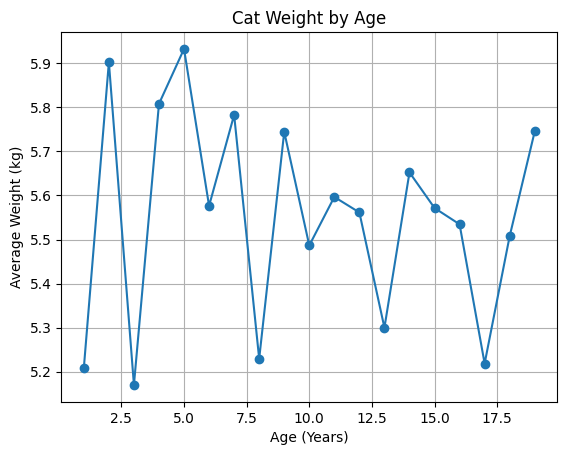

In [35]:
#Find the average cat weight by age
cat_weights = cats.groupby('age_years')['weight_kg'].mean()

# Create the plot
plt.plot(cat_weights.index, cat_weights.values, marker='o', linestyle='-') #.index assigns x values (ages), .values assigns y values (average weights), marker puts a dot for each data point, linestyle connects the points

# Labels
plt.xlabel('Age (Years)')
plt.ylabel('Average Weight (kg)')
plt.title('Cat Weight by Age')
plt.grid(True) #added grid lines for readability
plt.show()

### <u>Seaborn Plots</u>

#### *Number of Cats by Breed - Bar Chart*

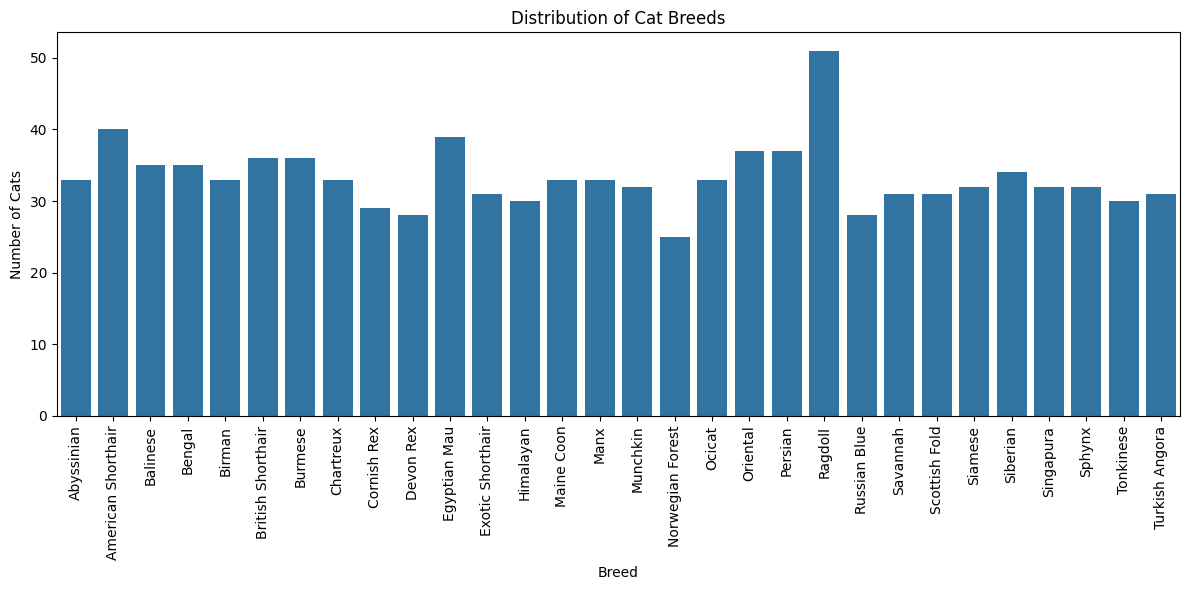

In [36]:
#Let's start by grouping cats by breed and totalling the amount per breed.
breed_count = cats.groupby('breed').size()

#Create a DataFrame based on the percentages calculated above.
breed_df = breed_count.reset_index()
breed_df.columns = ['breed', 'number']

#Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=breed_df, x='breed', y='number') #I could make this horizontal by switching the order of x and y, but with this many breeds I think vertical is better.

#Labels (using Matplotlib because Seaborn is built on top of it)
plt.xlabel('Breed')
plt.ylabel('Number of Cats')
plt.title('Distribution of Cat Breeds')
plt.xticks(rotation=90) #Takes the x axis labels (breeds) and tilts them for readability
plt.tight_layout() #Prevents x axis breeds from overlapping or running off the screen

plt.show()

#### *Number of Cats by Age Range - Histogram*

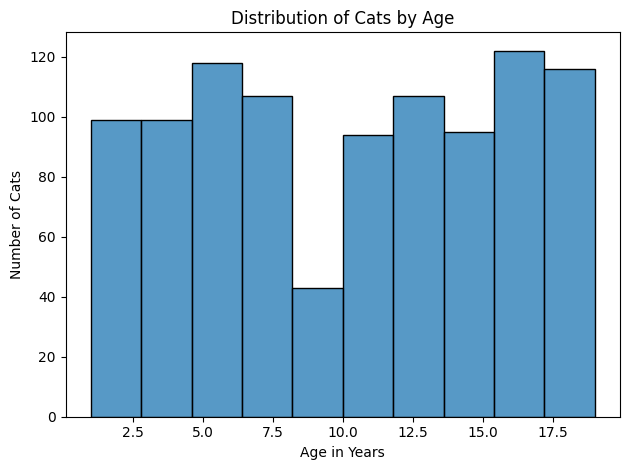

In [37]:
#Create a plot with age distributed into 10 bins
sns.histplot(data=cats, x='age_years', bins=10)

#Labels
plt.xlabel('Age in Years')
plt.ylabel('Number of Cats')
plt.title('Distribution of Cats by Age')
plt.tight_layout()

plt.show()

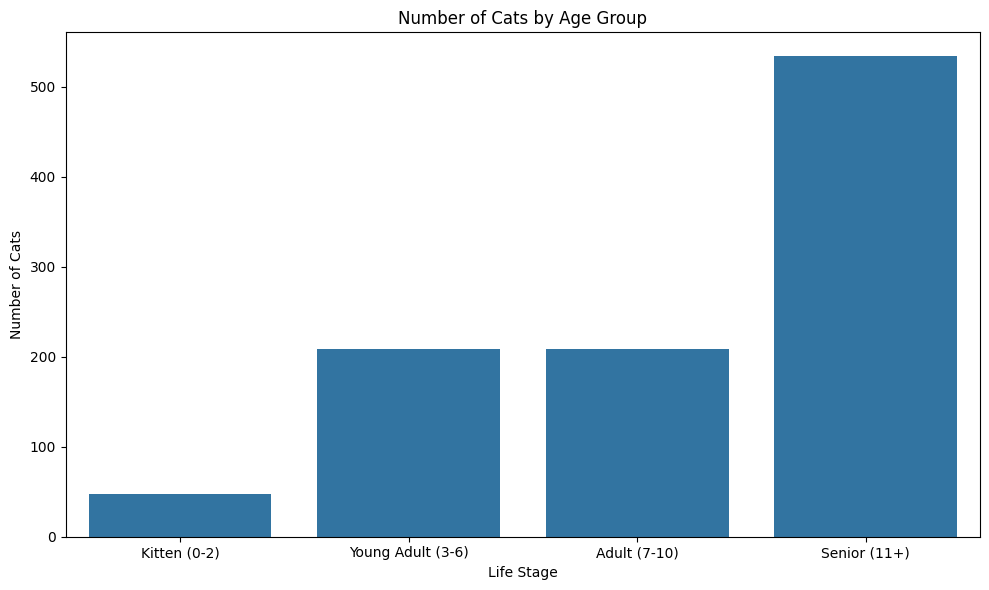

In [38]:
#Alternatively, I can specify the age ranges I want rather than putting them in even bins.

# Define your custom age bins and labels
bins = [0, 2, 6, 10, 20]  # change these ranges as needed
labels = ['Kitten (0-2)', 'Young Adult (3-6)', 'Adult (7-10)', 'Senior (11+)']

# Add a new column to the DataFrame for the age category
#pd.cut() takes the "age_years" column and cuts it up into the bins I specified
#setting right to False makes the right edge of each bin non-inclusive
cats['age_category'] = pd.cut(cats['age_years'], bins=bins, labels=labels, right=False) 

# Create Plot
plt.figure(figsize=(10, 6))
sns.countplot(data=cats, x='age_category')

# Labels
plt.xlabel('Life Stage')
plt.ylabel('Number of Cats')
plt.title('Number of Cats by Age Group')
plt.tight_layout()
plt.show()

### <u>Plotly Plots</u>

#### *Cat Sex by Breed - Grouped Bar Chart*

In [39]:
#Grouping data by breed and sex
breed_sex_count = cats.groupby(['breed', 'sex']).size().reset_index(name='count') #the last part resets the index and creates the column 'count' to hold the size values

#Creating a plot
fig = px.bar(breed_sex_count, x='breed', y='count', color='sex', barmode='group', #color='sex' means a different color is used for each sex
             labels={'count': 'Number of Cats', 'breed': 'Breed', 'sex': 'Sex'}, #gives a label name to each column used
             title='Number of Cats by Sex and Breed')

fig.show()

#### *Cat Sex by Color - Stacked Bar Chart*

In [40]:
#Grouping cats by sex and color, counting those groups, and creating a new 'count' column to contain that information
sex_color = cats.groupby(['sex', 'color']).size().reset_index(name='count')

#Creating a plot
fig = px.bar(sex_color, x='color', y='count', color='sex', barmode='stack',
             labels={'count': 'Number of Cats', 'color' : 'Color', 'sex' : 'Sex'},
             title='Number of Cats by Sex and Color')

fig.show()